![alt](img2.jpg)

In [1]:
#importing libraries:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


from warnings import filterwarnings 
filterwarnings('ignore')

In [2]:
#Importing the dataset:

data=pd.read_csv('onlinefoods.csv')
df=data.copy()
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


# the dataset contains information like:
![alt](img1.png)

In [5]:
#understanding the dataset:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [7]:
df_category=df.select_dtypes(include=['object'])
df_category.columns

Index(['Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,388.0,24.628866,2.975593,18.0000,23.000000,24.0000,26.000000,33.0000
Family size,388.0,3.280928,1.351025,1.0000,2.000000,3.0000,4.000000,6.0000
latitude,388.0,12.972058,0.044489,12.8652,12.936900,12.9770,12.997025,13.1020
longitude,388.0,77.600160,0.051354,77.4842,77.565275,77.5921,77.630900,77.7582
Pin code,388.0,560040.113402,31.399609,560001.0000,560010.750000,560033.5000,560068.000000,560109.0000


In [9]:
#checking for missing values:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [10]:
#dropping the distorted columns:

df.drop(["Unnamed: 12"],axis=1,inplace=True)
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [42]:
#Exploratory Data Analysis:

#1. How many orders are made by the customers?

orders=df[df["Output"]=="Yes"].value_counts().sum()
not_orders=df[df["Output"]=="No"].value_counts().sum()

print("Total number of orders made by the customers again: ",orders)
print("Total number of orders not made by the customers again: ",not_orders)

px.pie(df,names=df["Output"].value_counts().index,
       values=df["Output"].value_counts().values,
       title="Orders made by the customers again",
       template="plotly_dark")

Total number of orders made by the customers again:  301
Total number of orders not made by the customers again:  87


In [44]:
#2. occupation and orders correlation:

px.histogram(df,x="Occupation",color="Occupation",title="Occupation and orders correlation",
             template="plotly_dark", facet_col="Output")


In [54]:
#3. Marital status and orders correlation:

px.histogram(df,x="Marital Status",color="Marital Status",title="Marital status and orders correlation",
             template="plotly_dark", facet_col="Output")

In [63]:
#4-online food order decision based on age:

px.histogram(df,x="Age",color="Age",title="online food order decision based on age",
             template="plotly_dark", facet_col="Output",labels={"Age":"Age of the customers"})

In [89]:
#5-online food order decision based on family size:

px.histogram(df,x="Family size",color="Family size",title="online food order decision based on family size",
             facet_col="Output",template="plotly_dark",labels={"Family Size":"Family size of the customers"})

In [90]:
#6-online food order decision based on monthly income:

fig=px.bar(df,x="Monthly Income",color="Monthly Income",title="online food order decision based on monthly income",
            facet_col="Output",template="plotly_dark")
fig.update_layout(barmode="stack")
fig.show()

In [88]:
#7-online food order decision based on education:

# renaming the column name:
df.rename(columns={"Educational Qualifications":"Education level"},inplace=True)

px.histogram(df,x="Education level",color="Education level",title="online food order decision based on education",
             template="plotly_dark", facet_col="Output")



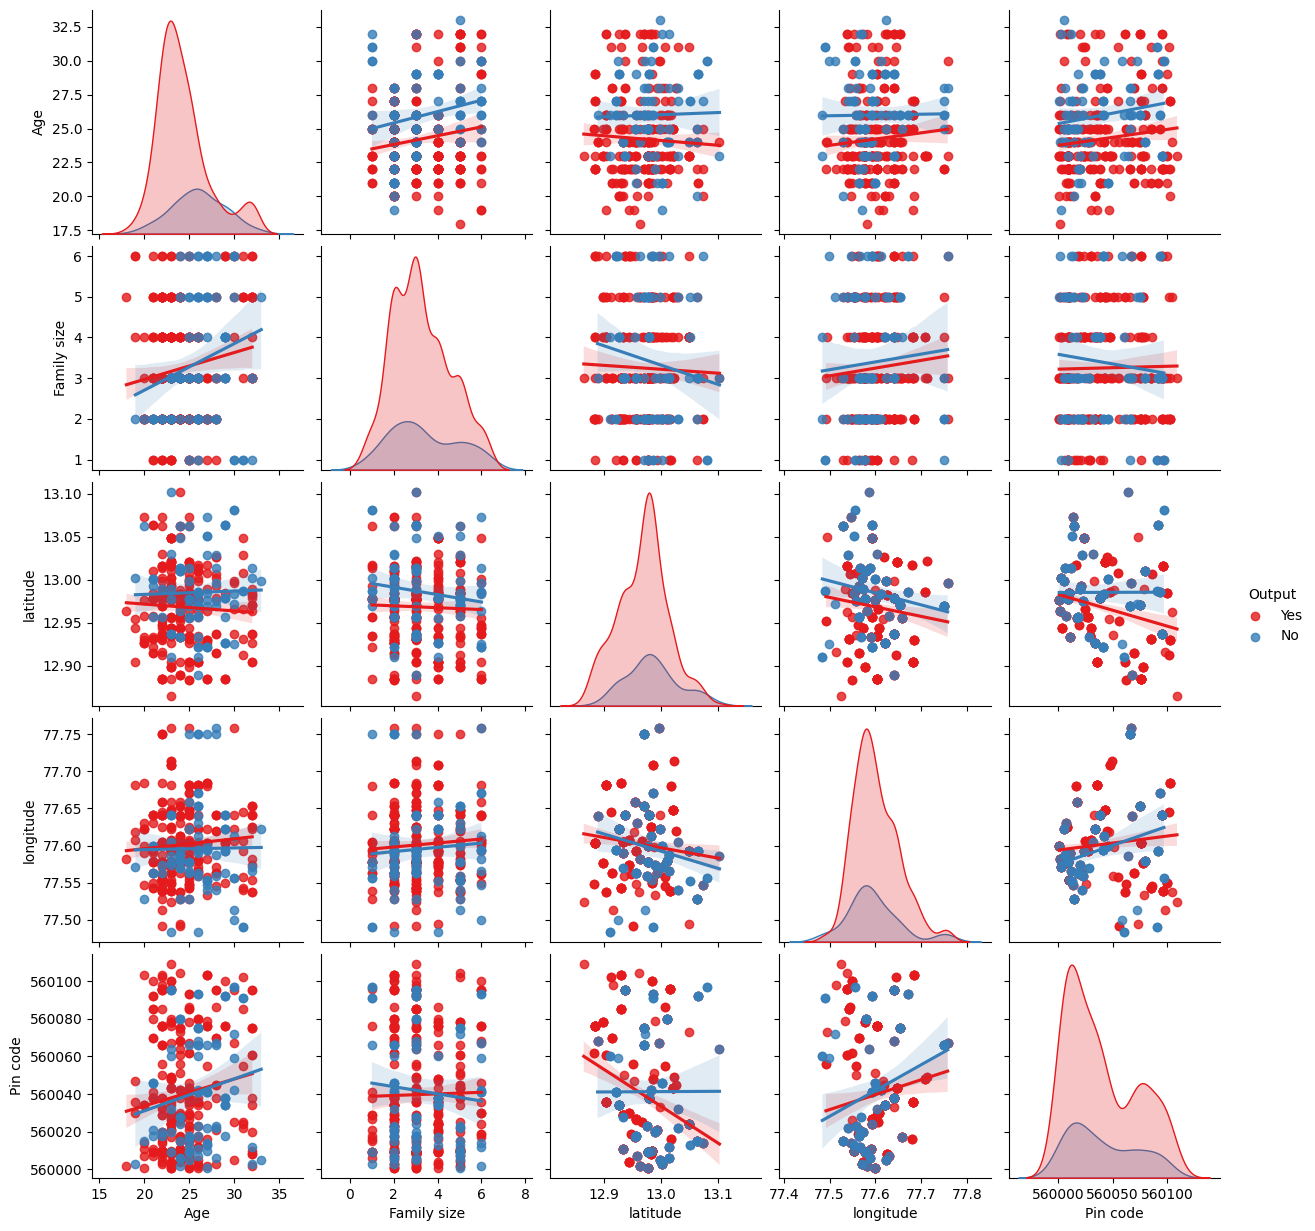

In [62]:
#8. distrubution of all the features:

sns.pairplot(df,hue="Output",palette="Set1",diag_kind="kde",kind="reg")

In [91]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Education level,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [92]:
#feature engineering:

#label encoding:

le=LabelEncoder()
features=["Occupation","Marital Status","Education level","Family size","Gender","Output","Feedback"]

for i in features:
    df[i]=le.fit_transform(df[i])

df["Monthly Income"]=df["Monthly Income"].map({"No Income": 0, 
                                                     "25001 to 50000": 5000, 
                                                     "More than 50000": 7000, 
                                                     "10001 to 25000": 25000, 
                                                     "Below Rs.10000": 10000})

df.head()


,Age,Gender,Marital Status,Occupation,Monthly Income,Education level,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,2,3,0,2,3,12.9766,77.5993,560001,1,1
1,24,0,2,3,10000,0,2,12.9770,77.5773,560009,1,1
2,22,1,2,3,10000,2,2,12.9551,77.6593,560017,1,0
3,22,0,2,3,0,0,5,12.9473,77.5616,560019,1,1
4,22,1,2,3,10000,2,3,12.9850,77.5533,560010,1,1


In [95]:
#preparing the data for modelling:

df.drop(["latitude","longitude"],axis=1,inplace=True) #run it only once

X=df.drop(["Output"],axis=1)
y=df["Output"]

#showing the correlation between the prepared features:
px.imshow(X.corr(),template="plotly_dark")

In [140]:
#splitting the data into train and test sets:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


#scaling the data:

sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


#Choosing the best model:

#models:
models = [('SVC', SVC()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('GBM', GradientBoostingClassifier()),
          ("LOG",LogisticRegression()),
          ("LGBM",LGBMClassifier()),
          ("XGBoost", XGBClassifier()),
          ("CatBoost",CatBoostClassifier(verbose=False)),
          ("KNN", KNeighborsClassifier()),
          ("NB",GaussianNB())]

accuracies = []
for name,model in models:
    # Step 5: Train and test the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Step 6: Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Step 7: Store the metric values
    accuracies.append(accuracy)

# Step 8: Analyze the results
for name,model in models:
    print(name,'->',"Accuracy:",accuracy_score(y_test, model.predict(X_test)),"Rmse:\n"+str(np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))
    

SVC -> Accuracy: 0.8632478632478633 Rmse:
0.36980013081681945
CART -> Accuracy: 0.8290598290598291 Rmse:
0.4134491152973615
RF -> Accuracy: 0.8803418803418803 Rmse:
0.34591634777518054
GBM -> Accuracy: 0.8888888888888888 Rmse:
0.3333333333333333
LOG -> Accuracy: 0.8547008547008547 Rmse:
0.38118124993124375
LGBM -> Accuracy: 0.8974358974358975 Rmse:
0.32025630761017426
XGBoost -> Accuracy: 0.8717948717948718 Rmse:
0.35805743701971643
CatBoost -> Accuracy: 0.8803418803418803 Rmse:
0.34591634777518054
KNN -> Accuracy: 0.8632478632478633 Rmse:
0.36980013081681945
NB -> Accuracy: 0.8461538461538461 Rmse:
0.3922322702763681


In [116]:
#model tuning:

lgbm_params={"learning_rate":[0.01,0.1,0.5,1],
             "n_estimators":[100,500,1000],
             "max_depth":[3,5,8],
             "colsample_bytree":[0.4,0.7,1]}

lgbm_cv_model=GridSearchCV(LGBMClassifier(),lgbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

lgbm_cv_model.best_params_

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


{'colsample_bytree': 1,
 'learning_rate': 1,
 'max_depth': 3,
 'n_estimators': 100}

In [139]:
#final model:

lgbm_tuned=LGBMClassifier(learning_rate=1,max_depth=3,n_estimators=100,colsample_bytree=1)
lgbm_tuned.fit(X_train,y_train)

y_pred=lgbm_tuned.predict(X_test)

# calculate accuracy
print("Accuracy:\n"+str(accuracy_score(y_test,y_pred)))


# Rmse score:
print("Rmse:\n"+str(np.sqrt(mean_squared_error(y_test,y_pred))))

# R2 score:
print("R2 Score:\n"+str(r2_score(y_test,y_pred)))

# mean_absolute_error:
print("mean_absolute_error:\n"+str(mean_absolute_error(y_test,y_pred)))

# Classification report 
print(classification_report(y_test,y_pred))

# confusion matrix
print("Confusion Matrix:\n"+str(confusion_matrix(y_test,y_pred)))
px.imshow(confusion_matrix(y_test,y_pred),template="plotly_dark",color_continuous_scale="Blues")


Accuracy:
0.9145299145299145
Rmse:
0.2923526731023431
R2 Score:
0.4401913875598086
mean_absolute_error:
0.08547008547008547
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.96      0.94      0.95        95

    accuracy                           0.91       117
   macro avg       0.85      0.88      0.86       117
weighted avg       0.92      0.91      0.92       117

Confusion Matrix:
[[18  4]
 [ 6 89]]


In [118]:
#Comparison of Actual and Predicted Values:
df2=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df2.head(25)

,Actual,Predicted
271,0,0
46,1,1
167,1,1
42,1,1
349,0,0
181,1,0
153,1,1
33,1,1
116,1,1
148,1,1
